In [1]:
from art_skills.wSL_trajectory_generator import TrajectoryGenerator
from art_skills.wSL_stroke_generator import StrokeGenerator
import numpy as np
import matplotlib.pyplot as plt
# py.offline.init_notebook_mode(connected=True)

In [2]:
# GTSAM SLN Unit Testing
parameters = {"dt": 0.01, 
              "t_points": np.array([[0,0], [50, 0], [100,0]]).T,
              "delta": np.array([0.0, 0.0]),
              "Ac": np.array([0.05, 0.05]),
              "delta_t": np.array([0.0, 0.4]), 
              "T": 0.5}

strokegen = StrokeGenerator()
sigma = strokegen.sigma(parameters["Ac"])
mu = strokegen.mu(sigma, parameters["T"])
#print("sigma", sigma)
#print("mu", mu)
t0, t = strokegen.t0_t(parameters["dt"], sigma, mu, parameters["T"], parameters["delta_t"])
#print("t0", t0)
# D =  strokegent.D_theta(parameters["t_points"], parameters["delta"])
# print("D", D[0])
# th1 = 1
# print("th1", th1)
# th2 = 1
# print("th2", th2)


# Berio Code
# parameters = {"dt": 0.01, 
#                 "t_points": np.array([[0,0], [-50, 100], [100,70], [-40, 120]]).T,
#                 "delta": np.array([0.3, 0.3, 0.3]), 
#                 "Ac": np.array([0.05, 0.05, 0.05]),
#                 "delta_t": np.array([0.4, 0.4, 0.4]), 
#                 "T": 0.3}
              # note: period is for each stroke, with endtime being calculated as t0[0] + t[-1] + period

# Letter G
    # parameters = {"dt": 0.01,
    #               "t_points": np.array([[0,0], [-100,100], [-200,-100], [-100,-300], [0,-100], [-100,-100]]).T,
    #               "delta": np.array([0.4, 0.4, 0.4, 0.4, 0.4]), 
    #               "Ac": np.array([0.05, 0.05, 0.05, 0.05, 0.05]),
    #               "delta_t": np.array([0.3, 0.3, 0.3, 0.3, 0.7]), 
    #               "T": 0.8}

# Fig 8. Djioua08EPM
    #parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]).T, "delta": np.array([-0.5, 0.5]), "Ac": np.array([0.043949, 0.1082468]), "delta_t": np.array([0, 0]), "T": 0.4}
    #parameters = {"dt": 0.01, "t_points": np.array([[25,18], [6,4], [8,5.5]]), "delta": [-0.5, 0.5], "Ac": [0.043949, 0.1082468], "delta_t": [0, 0], "T": [0.5, 0.2]}

t_points = parameters["t_points"]
trajectory_generator = TrajectoryGenerator(**parameters)
trajectory, strokes = trajectory_generator.generate_trajectory()
maxima = trajectory_generator.extract_strokes()

#print(trajectory)

#print(maxima)

velocity = trajectory_generator.velocity()
#SL = np.multiply(velocity[0:5], 1/D[0][0])
#print(SL)

unit x [0.14819899]
[0.05 array([1.50799612]) array([0.])]
[0.1 array([8.11741321]) array([0.])]
[0.15 array([20.21929084]) array([0.])]
[0.2 array([32.72157755]) array([0.])]
[0.25 array([42.94530815]) array([0.])]
[0.34 array([65.78952532]) array([0.])]
[0.39 array([79.7163996]) array([0.])]
[0.44 array([89.78552592]) array([0.])]
[0.49 array([95.47698334]) array([0.])]
[0.54 array([98.17967079]) array([0.])]
[8.07040837]


<ipython-input-3-e902408d6984>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_meas = np.array([timeval, ptx, pty])
<ipython-input-3-e902408d6984>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_meas = np.array([timeval, ptx, pty])


Text(0, 0.5, 'speed')

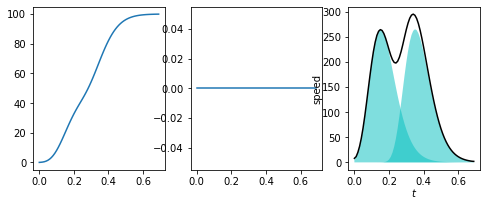

In [3]:
timeval = round(0.01, 2)
index = np.where(t == timeval)
ptx = trajectory[0, index[0]]
print("unit x", ptx)

for i in range(5):
    timeval = round(0.05*(i+1), 2)
    index = np.where(t == timeval)
    ptx = trajectory[0, index[0]]
    pty = trajectory[1, index[0]]
    new_meas = np.array([timeval, ptx, pty])
    print(new_meas)
for i in range(5):
    timeval = round(0.29 + 0.05*(i+1), 2)
    index = np.where(t == timeval)
    ptx = trajectory[0, index[0]]
    pty = trajectory[1, index[0]]
    new_meas = np.array([timeval, ptx, pty])
    print(new_meas)

timeval = round(0.01)
index = np.where(t == timeval)
vel = velocity[index[0]]

fig = plt.figure(figsize=(8,3))
plt.subplot(131)
#plt.scatter(t_points[0,:], t_points[1,:], c='k')
plt.plot(t, trajectory[0,:])
plt.subplot(132)
plt.plot(t, trajectory[1,:])

plt.subplot(133)
for i, s in enumerate(strokes):
    plt.fill_between(t, 0, s, where=s>0, facecolor='c', alpha=0.5)

plt.plot(t, velocity, 'k')
plt.xlabel('$t$', labelpad=0)
plt.ylabel('speed', labelpad=0)